Epoch 1/15
781/781 ━━━━━━━━━━━━━━━━━━━━ 118s 146ms/step - accuracy: 0.3491 - loss: 2.0067 - val_accuracy: 0.5692 - val_loss: 1.1952
Epoch 2/15
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5625 - loss: 1.1710 - val_accuracy: 0.5579 - val_loss: 1.2375
Epoch 3/15
781/781 ━━━━━━━━━━━━━━━━━━━━ 114s 147ms/step - accuracy: 0.6010 - loss: 1.1208 - val_accuracy: 0.6822 - val_loss: 0.8981
Epoch 4/15
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7188 - loss: 0.8110 - val_accuracy: 0.6853 - val_loss: 0.8883
Epoch 5/15
781/781 ━━━━━━━━━━━━━━━━━━━━ 115s 147ms/step - accuracy: 0.6775 - loss: 0.9213 - val_accuracy: 0.6931 - val_loss: 0.8725
Epoch 6/15
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7656 - loss: 0.9215 - val_accuracy: 0.7015 - val_loss: 0.8443
Epoch 7/15
781/781 ━━━━━━━━━━━━━━━━━━━━ 114s 146ms/step - accuracy: 0.7216 - loss: 0.7989 - val_accuracy: 0.7537 - val_loss: 0.7132
Epoch 8/15
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6719 - loss: 0.8451 - 

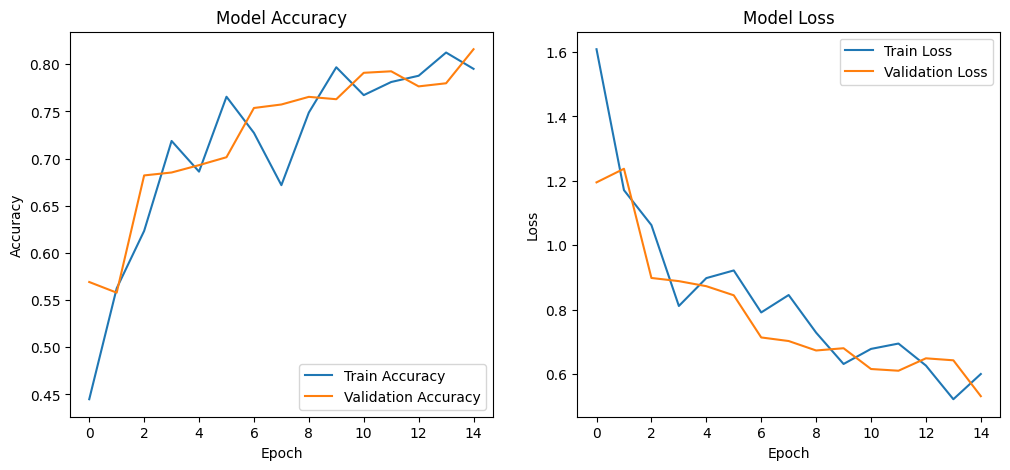

In [ ]:

# import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load and prepare the CIFAR-10 dataset
(cifar_images, cifar_labels), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the input images
cifar_images = cifar_images.astype('float32') / 255.0  # Normalize training images
x_test = x_test.astype('float32') / 255.0              # Normalize test images

# Convert labels to one-hot encoding
cifar_labels = tf.keras.utils.to_categorical(cifar_labels, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Design a new CNN models with the following features
'''
    a convolutional layer with ReLU activation and 32 filters (filter size (3,3)) and a padding='same',
    a Batch Normalization layer
    a convolutional layer with ReLU activation and 32 filters (filter size (3,3)) and a padding='same'
    a Batch Normalization layer,
    a (2,2) Max Pooling layer
    a Dropout layer with a dropping probability=0.2

    a convolutional layer with ReLU activation and 64 filters (filter size (3,3)) and a padding='same',
    a Batch Normalization layer
    a convolutional layer with ReLU activation and 64 filters (filter size (3,3)) and a padding='same'
    a Batch Normalization layer,
    a (2,2) Max Pooling layer
    a Dropout layer with a dropping probability=0.3

    a convolutional layer with ReLU activation and 128 filters (filter size (3,3)) and a padding='same',
    a Batch Normalization layer
    a convolutional layer with ReLU activation and 128 filters (filter size (3,3)) and a padding='same'
    a Batch Normalization layer,
    a (2,2) Max Pooling layer
    a Dropout layer with a dropping probability=0.4

    a flattening layer to convert the 2D feature maps into a 1D vector.
    a Dense layers with 128 nodes and a relu activation function.
    a Batch Normalization layer
    a Dropout layer with a dropping probability=0.5
    a Dense layer that lead to the final classification output. The last layer should have 10 units with a softmax activation function, corresponding to the CIFAR-10 classes.
'''
model = models.Sequential([
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


# Compile the model
'''
Use an optimizer and loss function suitable for a classification problem
(categorical cross-entropy is recommended), and include accuracy as a metric.
'''
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up data augmentation.
# Use imported 'ImageDataGenerator'. Examine the following parameters to achieve
# the best performance (at least 84% test accuracy)
# 'rotation_range', 'width_shift_range', 'height_shift_range',
# 'horizontal_flip', and 'zoom_range'.
datagen = ImageDataGenerator(
    rotation_range=0,       
    width_shift_range=0,        
    height_shift_range=0,    
    shear_range=0,     
    zoom_range=0,             
    horizontal_flip=True, 
)

# Apply defined datagen to cifar images
datagen.fit(cifar_images)

# Train the model for 15 epochs.
batch_size = 64
history = model.fit(datagen.flow(cifar_images, cifar_labels, batch_size=batch_size),
                    steps_per_epoch=cifar_images.shape[0] // batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Plot training & validation accuracy values for all different models (In total,  )
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


My model takes about 15 minutes to train, and I tried about 10 different parameters and this was the best I could get, I cant afford to spend more time on this so I am turning it in as is.

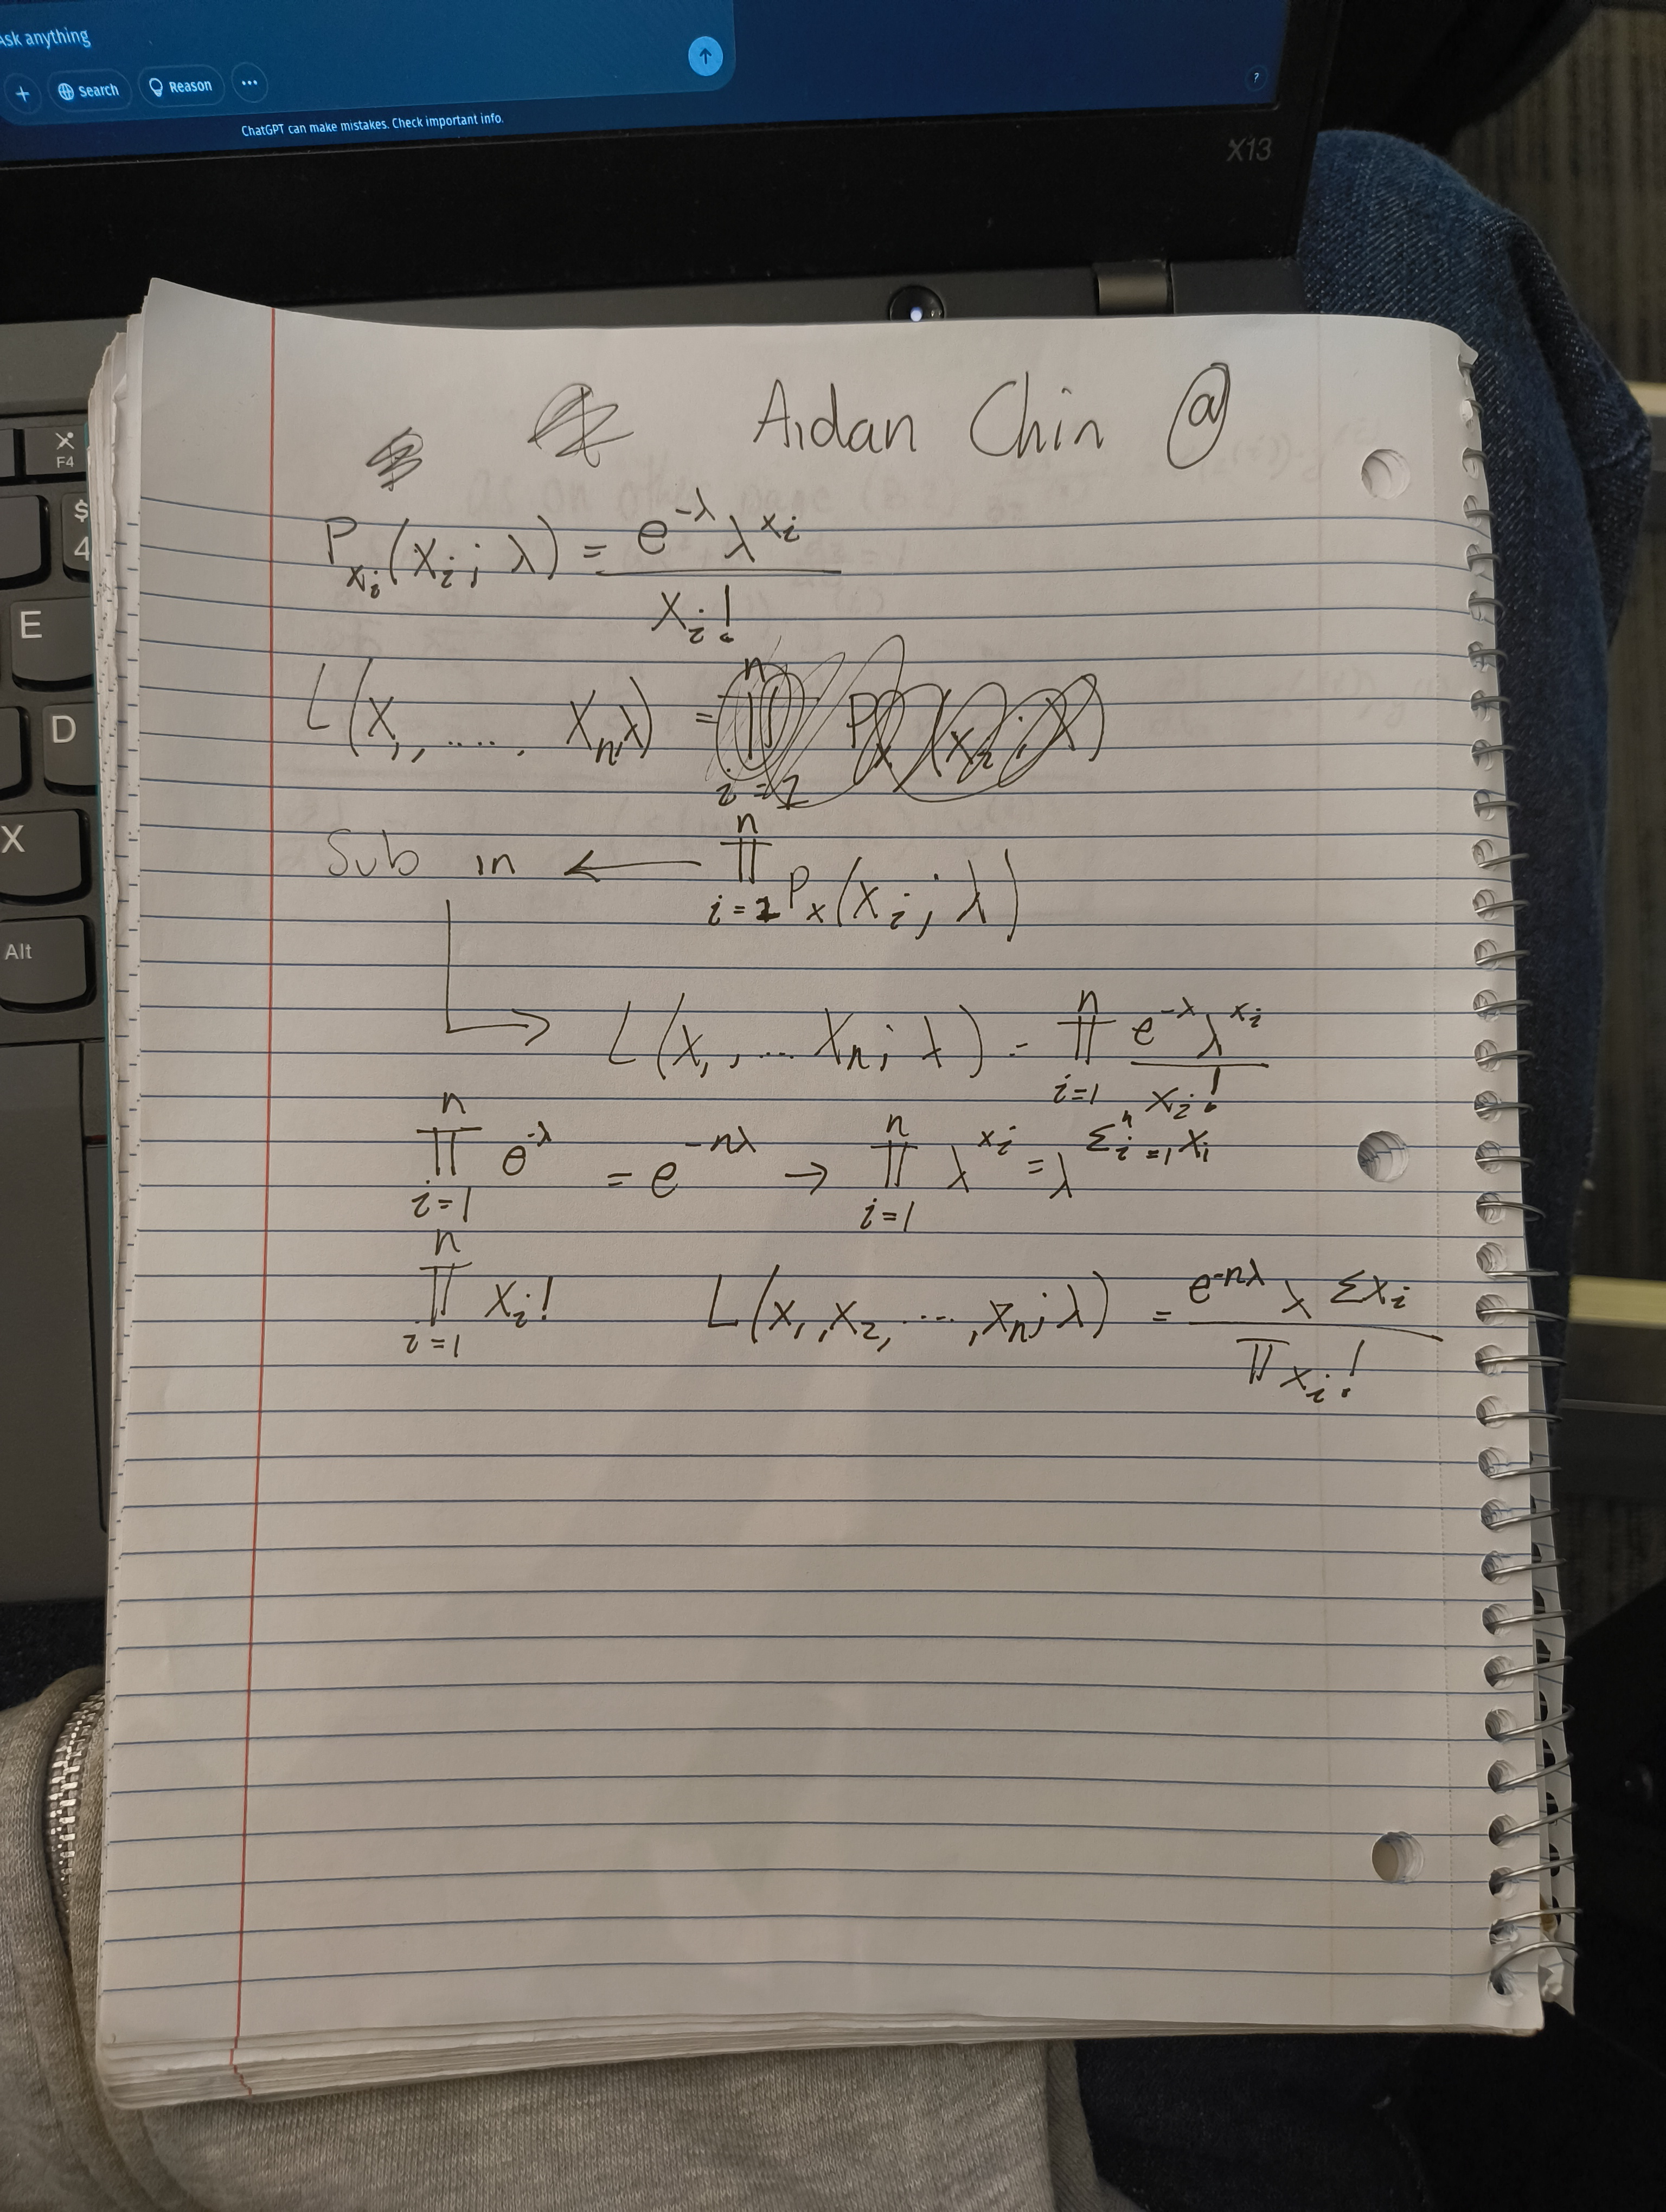

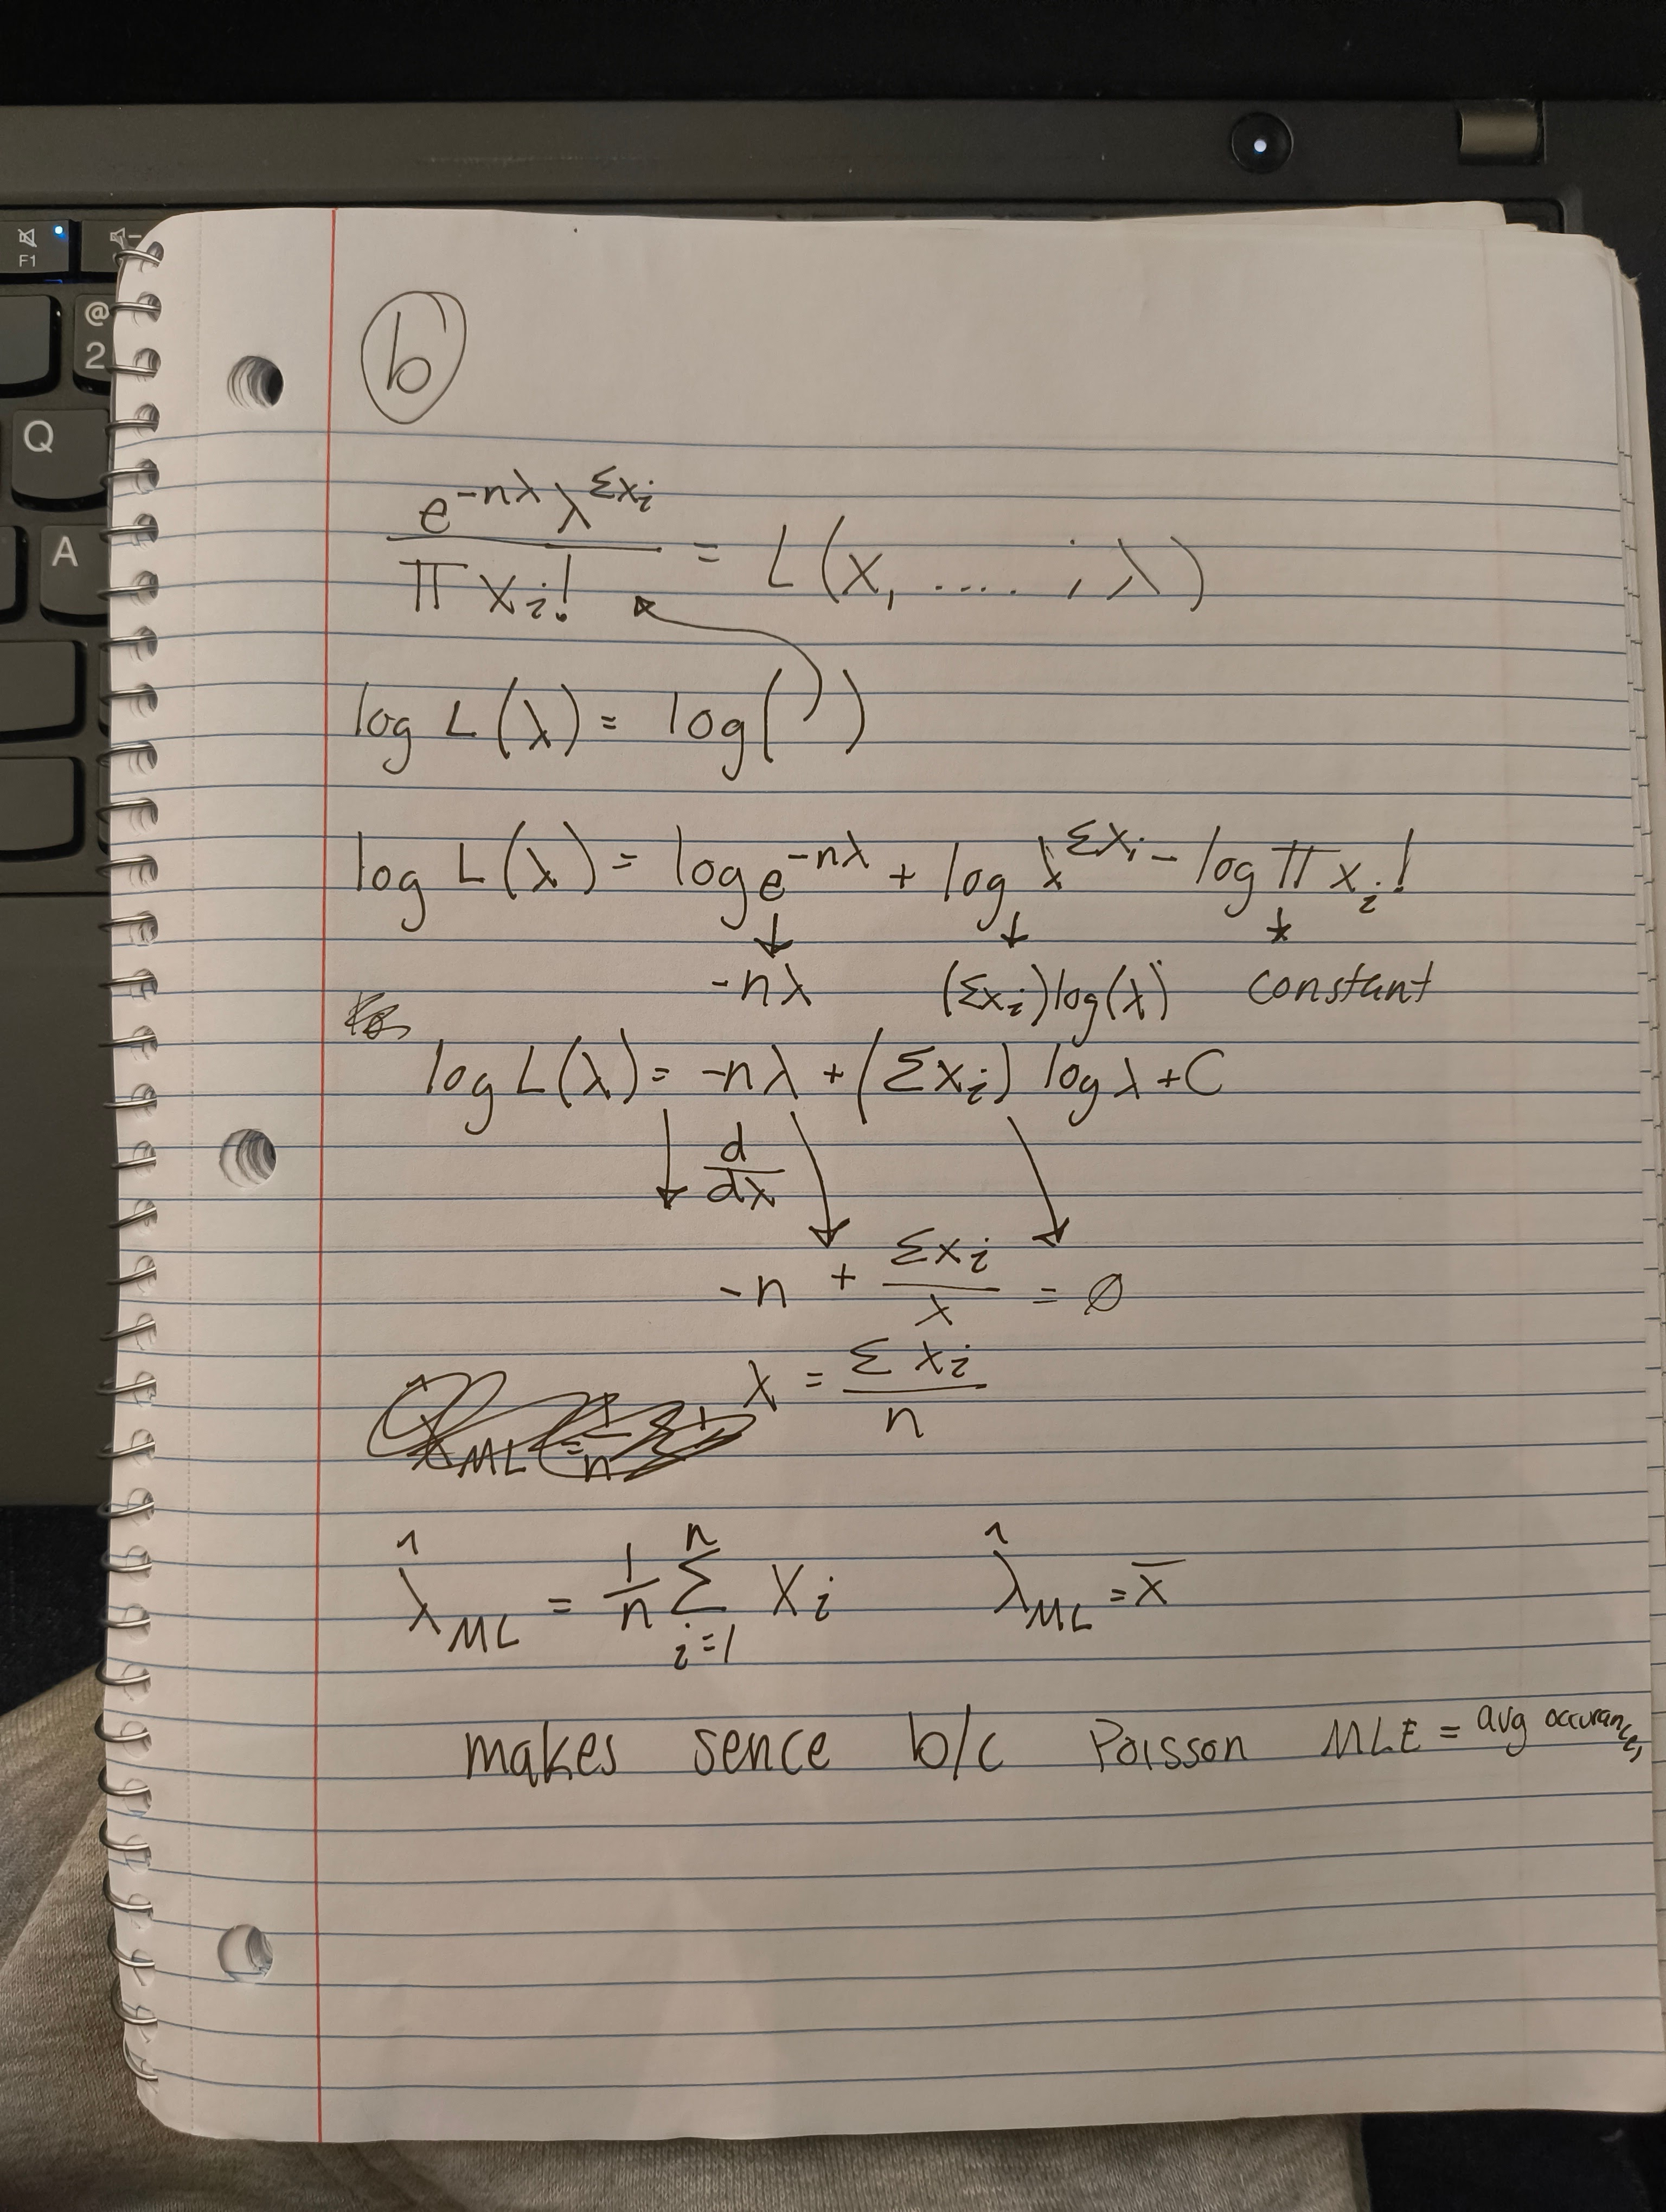